# Assignment 3 (ML Project)
### Dataset = Kaggle - Google Play Store Apps (*https://www.kaggle.com/lava18/google-play-store-apps*)

Group 27
1. **Jonathan Vieri** - 219559949
2. **Jason Andrea Limas** - 219559869
3. **Rakyan Satrya Adhikara** - 219548135
4. **Venura Hewage** - 215287247

### Importing all necessary libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LinearRegression

### Inserting the data

In [2]:
# Inserting the data
data = pd.read_csv('data/googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Cleaning the data
#### Dropping rows
There are a number of rows that have 'NaN' values and that have duplicate values. Thus, it is better to drop those wors so that the data can be analyzed for better results without any errors.

First of, we drop all the data that have 'NaN' values by using the `dropna()` function.

In [3]:
# Check if there is any 'NaN' values present in the data
data.isnull().values.any()

True

In [4]:
# Cleans the data using the dropna() and drop_duplicates() function from pandas
# The dropna() function will remove rows which contain missing values
data_clean = data.dropna()
index = data_clean.index
print(index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10828, 10829, 10830, 10832, 10833, 10834, 10836, 10837, 10839,
            10840],
           dtype='int64', length=9360)


Then, we drop all the columns that have duplicate values by using the `drop_duplicates()` function.

In [5]:
# The drop_duplicates() function will remove any duplicate data
data_clean = data_clean.drop_duplicates()
index = data_clean.index
print(index)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10828, 10829, 10830, 10832, 10833, 10834, 10836, 10837, 10839,
            10840],
           dtype='int64', length=8886)


After dropping the rows, noticed that the indexes hasn't changed yet. Thus, it is better to reindex the dataframe by using the `reset_index()` function.

In [6]:
# Reindexing the dataframe after dropping rows
# by using reset_index() function
data_clean = data_clean.reset_index(drop=True)
index = data_clean.index
print(index)
data_clean.tail()

RangeIndex(start=0, stop=8886, step=1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8881,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
8885,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#### Converting values and dropping columns
It is brought to our attention that there are some columns that will not be part of the analysis, those are:
- `Last Updated`
- `Current Ver`
- `Android Ver`

There are also some columns that have wrong datatypes. Therefore, it is better to convert all those necessary columns. Those columns are:
- `Reviews` (to `int64` datatype)
- `Price` (to `float` datatype)
- `Installs` (to `int64` datatype)

In [7]:
# Drop any columns that are unnecessary to be used for the analysis by using the 'drop()' function
data_clean = data_clean.drop(['Last Updated', 'Current Ver', 'Android Ver'], 1)
data_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [8]:
# Converting the 'Reviews' and 'Price' rows to appropriate datatypes
# 'Reviews' column to int64
data_clean.Reviews = pd.to_numeric(data_clean.Reviews, errors='coerce')
data_clean.Reviews

0          159
1          967
2        87510
3       215644
4          967
         ...  
8881         7
8882        38
8883         4
8884       114
8885    398307
Name: Reviews, Length: 8886, dtype: int64

In [9]:
# 'Price' column to Float
data_clean.Price = data_clean.Price.str.replace('$','')
data_clean.Price = pd.to_numeric(data_clean.Price, errors='coerce')
data_clean.Price

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8881    0.0
8882    0.0
8883    0.0
8884    0.0
8885    0.0
Name: Price, Length: 8886, dtype: float64

In [10]:
# 'Installs' column to Int64
data_clean.Installs = data_clean.Installs.str.replace('+','')
data_clean.Installs = data_clean.Installs.str.replace(',','')
data_clean.Installs = pd.to_numeric(data_clean.Installs, errors='coerce')
data_clean.Installs

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
8881         500
8882        5000
8883         100
8884        1000
8885    10000000
Name: Installs, Length: 8886, dtype: int64

From what we know, there are:
1. 8886 data that will be used
2. 10 types of columns. Among them, there are:
    - 4 Numerical columns
    - 6 Categorical columns

### Print the Numerical data

In [11]:
# Decribe the 'Rating' row
data_clean.Rating.describe().round(5)

count    8886.00000
mean        4.18796
std         0.52243
min         1.00000
25%         4.00000
50%         4.30000
75%         4.50000
max         5.00000
Name: Rating, dtype: float64

In [12]:
# Decribe the 'Rating' row
data_clean.Reviews.describe()

count    8.886000e+03
mean     4.730928e+05
std      2.906007e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.723000e+03
75%      7.131325e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [13]:
# Decribe the 'Price' row
data_clean.Price.describe()

count    8886.000000
mean        0.963526
std        16.194792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [14]:
# Decribe the 'Price' row
data_clean.Installs.describe()

count    8.886000e+03
mean     1.650061e+07
std      8.640413e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### Print the Categorical Data

In [15]:
# Print first 5 columns of 'Category' row along with count value of it and top 5 'Category'
print(data_clean['Category'].head())
print("Unique members: ", data_clean['Category'].nunique())
df_category = data_clean.groupby('Category')['App'].nunique()
df_category_head = df_category.sort_values(ascending=False)
df_category_head

0    ART_AND_DESIGN
1    ART_AND_DESIGN
2    ART_AND_DESIGN
3    ART_AND_DESIGN
4    ART_AND_DESIGN
Name: Category, dtype: object
Unique members:  33


Category
FAMILY                 1683
GAME                    913
TOOLS                   719
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         296
MEDICAL                 291
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  262
COMMUNICATION           257
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           149
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: App, dtype: int64

In [16]:
# Print first 5 columns of 'Size' row along with count value of it and top 5 'Category'
print(data_clean['Size'].head())
print("Unique members: ", data_clean['Size'].nunique())
df_size = data_clean.groupby('Size')['App'].nunique()
df_size.sort_values(ascending=False).head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object
Unique members:  413


Size
Varies with device    1171
14M                    148
12M                    147
11M                    143
13M                    143
Name: App, dtype: int64

In [17]:
# Print first 5 columns of 'Type' row along with count value of it and top 5 'Category'
print(data_clean['Type'].head())
print("Unique members: ", data_clean['Type'].nunique())
df_type = data_clean.groupby('Type')['App'].nunique()
df_type.sort_values(ascending=False).head()

0    Free
1    Free
2    Free
3    Free
4    Free
Name: Type, dtype: object
Unique members:  2


Type
Free    7590
Paid     602
Name: App, dtype: int64

In [18]:
# Print first 5 columns of 'Content Rating' row along with count value of it and top 5 'Category'
print(data_clean['Content Rating'].head())
print("Unique members: ", data_clean['Content Rating'].nunique())
df_cont_rat = data_clean.groupby('Content Rating')['App'].nunique()
df_cont_rat.sort_values(ascending=False).head()

0    Everyone
1    Everyone
2    Everyone
3        Teen
4    Everyone
Name: Content Rating, dtype: object
Unique members:  6


Content Rating
Everyone           6612
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Name: App, dtype: int64

In [19]:
# Print first 5 columns of 'Genres' row along with count value of it and top 5 'Category'
print(data_clean['Genres'].head())
print("Unique members: ", data_clean['Genres'].nunique())
df_genre = data_clean.groupby('Genres')['App'].nunique()
df_genre.sort_values(ascending=False).head()

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object
Unique members:  115


Genres
Tools            718
Entertainment    471
Education        429
Finance          302
Productivity     301
Name: App, dtype: int64

### Correlating data
1. Ratings with Reviews
2. Ratings with Content Rating
3. Installs with Genres
4. Ratings, Reviews and Installs

Temporary Hypothesis:
- Art & Design have high value on `Installs` and `Reviews`
- Education have high value on `Installs`
- High `Installs` = High `Ratings`
- High `Installs` = High `Reviews`

### Plots

Text(0, 0.5, 'Applications')

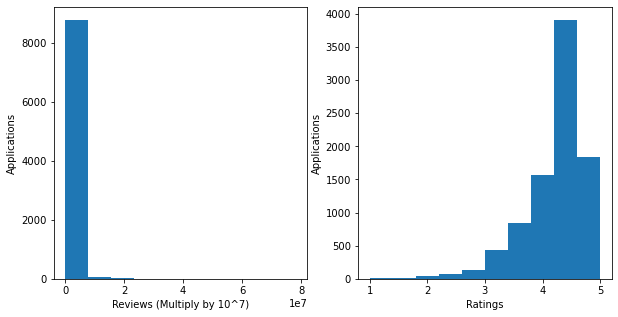

In [20]:
# Ratings with Reviews (Histogram)
x = data_clean.Reviews
y = data_clean.Rating

fig, plot_rating_review = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plot_rating_review[0].hist(x)
plot_rating_review[0].set_xlabel('Reviews (Multiply by 10^7)')
plot_rating_review[0].set_ylabel('Applications')

plot_rating_review[1].hist(y)
plot_rating_review[1].set_xlabel('Ratings')
plot_rating_review[1].set_ylabel('Applications')

In [21]:
# Correlation table for Ratings, Reviews, Installs and Price
corr = data_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068724,0.050869,-0.022371
Reviews,0.068724,1.000000,0.633422,-0.009562
Installs,0.050869,0.633422,1.000000,-0.011334
Price,-0.022371,-0.009562,-0.011334,1.000000


In [22]:
# Ratings with Content Rating (Box Plot)
fig, plot_rating_review = plt.subplots(figsize=(10, 5))
    data_clean.boxplot(column=['Rating'], by='Content Rating', ax=plot_rating_review)

IndentationError: unexpected indent (<ipython-input-22-722c4cfda7ef>, line 3)

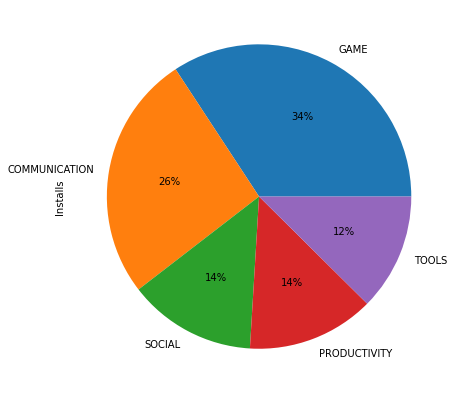

In [23]:
# Installs with Categories (Pie Chart)
installs_cat_pivot = pd.pivot_table(data=data_clean,
              index='Category',
              values='Installs',
              aggfunc='sum')
installs_cat_pivot = installs_cat_pivot.reindex(installs_cat_pivot['Installs'].sort_values(ascending=False).index).head(5)
plot = installs_cat_pivot.plot.pie(y='Installs', figsize=(7, 7), legend=False, autopct='%1.0f%%')

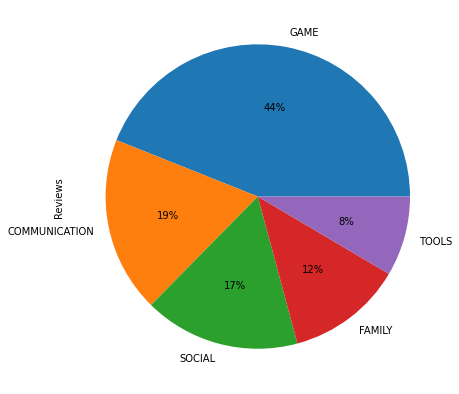

In [24]:
# Reviews with Categories (Pie Chart)
review_cat_pivot = pd.pivot_table(data=data_clean,
              index='Category',
              values='Reviews',
              aggfunc='sum')
review_cat_pivot = review_cat_pivot.reindex(review_cat_pivot['Reviews'].sort_values(ascending=False).index).head(5)
plot = review_cat_pivot.plot.pie(y='Reviews', figsize=(7, 7), legend=False, autopct='%1.0f%%')

In [25]:
dframe = pd.DataFrame(data_clean)

In [26]:
df = dframe.sample(frac=0.11)

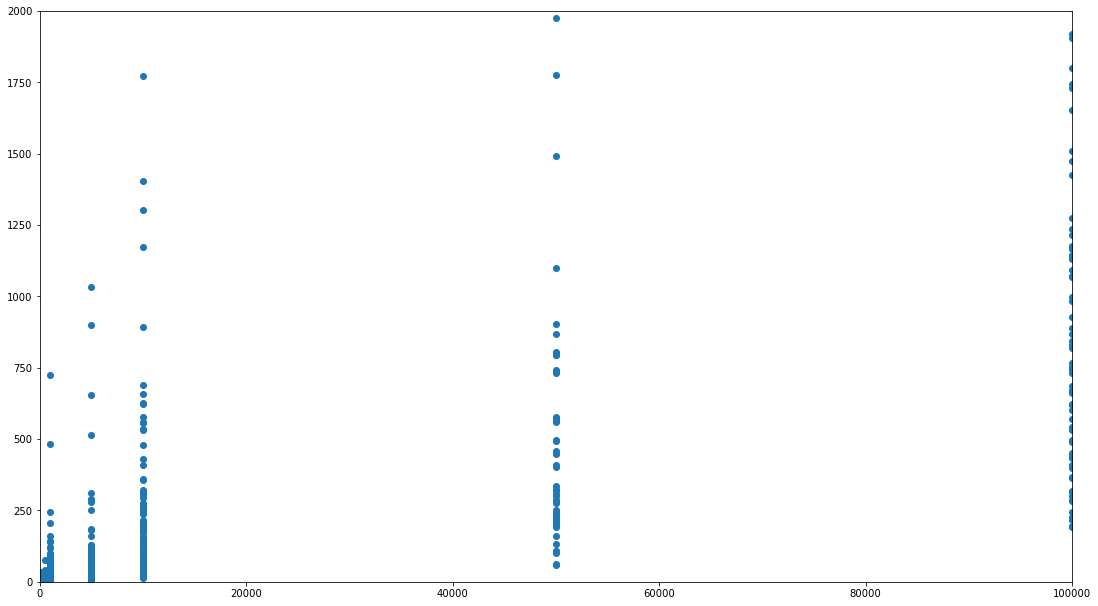

In [27]:
fig = plt.figure();
ax1 = fig.add_subplot(1, 1, 1)
fig.set_size_inches(18.5, 10.5)
ax1.set_xlim([0, 100000])
ax1.set_ylim([0,2000])
#plt.scatter(df.Installs,df.Reviews)
ax1.scatter(df.Installs,df.Reviews)

In [28]:

X = dframe.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dframe.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [29]:
print(df.Installs)

4600       1000
2870    5000000
4140     100000
6267    5000000
8863    1000000
         ...   
2809     500000
4197     100000
1712     100000
6726     100000
1021     100000
Name: Installs, Length: 977, dtype: int64


In [30]:
print(df.Reviews)

4600       41
2870    77724
4140     2160
6267    71740
8863    56496
        ...  
2809     7583
4197     8537
1712      685
6726      316
1021     1920
Name: Reviews, Length: 977, dtype: int64


In [31]:
dframe.columns.get_loc("Reviews")

3

In [32]:
dframe.columns.get_loc("Installs")

5

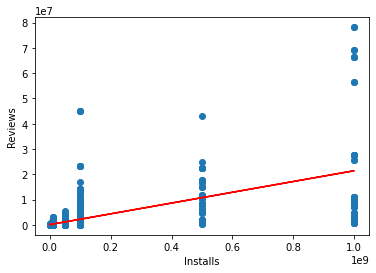

In [33]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.show()

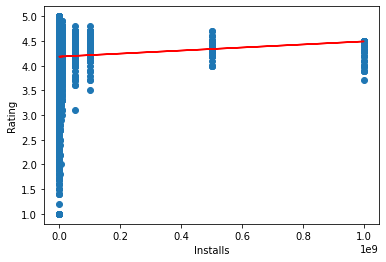

In [36]:
X = dframe.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dframe.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()




In [35]:
dframe.columns.get_loc("Rating")

2

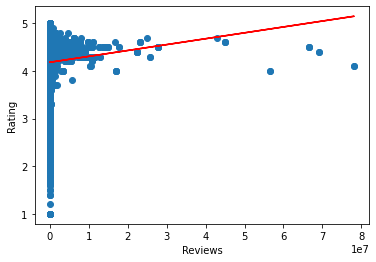

In [37]:
X = dframe.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dframe.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()